In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Data/Real-Data/Real_Combine1.csv')

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


## Null values

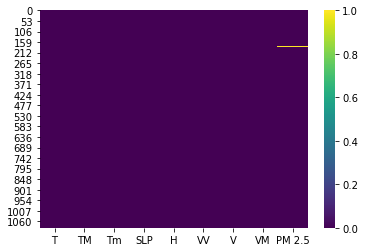

In [4]:
## Check for null values
#we check null with df.isnull but it is not possible on big amount of data
# so we use seaborn for it

sns.heatmap(df.isnull(),cmap='viridis')

In [5]:
df=df.dropna()

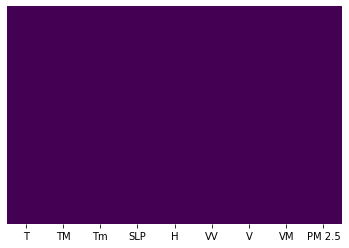

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')# we remove all null values

In [7]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features


#if we have many features, we have to find out which features are more important for us, for that we use pairplot and .corr
here we use two methods for features selction:
#1) cor-relation
#2) features importance

###  cor-relation

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

### features importance

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

In [ ]:
print(model.feature_importances_)

# DecisionTreeRegressor

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtree=DecisionTreeRegressor(criterion="mse")

In [ ]:
dtree.fit(X_train,y_train)

In [ ]:
dtree.score(X_train, y_train)

In [ ]:
dtree.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)

In [ ]:
score.mean()

In [ ]:
import pickle

file = open('DecisionTreeRegressor_model.pkl', 'wb')

pickle.dump(regressor, file)